# Projet Python 2025

# Etape 5 : Interprétation et visualisation

## Aperçu du DataFrame

In [46]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("alertes_enrichies.csv")
df.head()


,Titre Alerte,Type,Description,Lien,Date,CVE ID,Description CVE,CWE,Nature de la faille,Score CVSS,Gravité CVSS,Score EPSS,Gravité EPSS,Éditeur,Produit,Versions Affectées
0,Multiples vulnérabilités dans MISP (08 décembr...,Avis,De multiples vulnérabilités ont été découverte...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Mon, 08 Dec 2025 00:00:00 +0000",CVE-2025-67906,"In MISP before 2.5.28, app/View/Elements/Workf...",CWE-79,CWE-79 Improper Neutralization of Input During...,5.4,Moyenne,0.00035,Faible,MISP,MISP,0
1,Vulnérabilité dans les produits Mitel (11 déce...,Avis,Une vulnérabilité a été découverte dans les pr...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Thu, 11 Dec 2025 00:00:00 +0000",CVE-2025-67823,NaN,Non disponible,Non disponible,NaN,Non disponible,NaN,Non disponible,MISP,MISP,0
2,Multiples vulnérabilités dans Roundcube (15 dé...,Avis,De multiples vulnérabilités ont été découverte...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Mon, 15 Dec 2025 00:00:00 +0000",CVE-2025-68461,Roundcube Webmail before 1.5.12 and 1.6 before...,CWE-79,CWE-79 Improper Neutralization of Input During...,7.2,Élevée,0.00042,Faible,Roundcube,Webmail,"0, 1.6.0"
3,Multiples vulnérabilités dans les produits VMw...,Avis,De multiples vulnérabilités ont été découverte...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Fri, 19 Dec 2025 00:00:00 +0000",CVE-2025-66031,Forge (also called `node-forge`) is a native i...,CWE-674,CWE-674: Uncontrolled Recursion,NaN,Non disponible,0.00110,Faible,digitalbazaar,forge,< 1.3.2
4,Multiples vulnérabilités dans les produits Fox...,Avis,De multiples vulnérabilités ont été découverte...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Fri, 19 Dec 2025 00:00:00 +0000",CVE-2025-13941,A local privilege escalation vulnerability exi...,CWE-732,CWE-732: Incorrect Permission Assignment for C...,8.8,Élevée,0.00012,Faible,Foxit Software Inc.,Foxit PDF Editor,"Versions 2025.2.1 and earlier, Versions 14.0.1..."


## Lien entre score CVSS et score EPSS

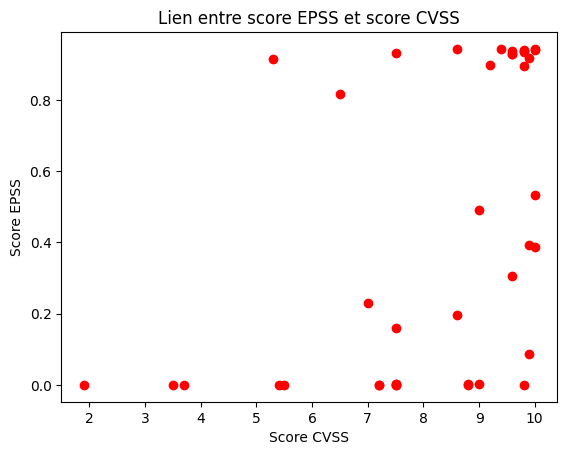

In [47]:
plt.plot(df.get("Score CVSS"), df.get("Score EPSS"), "ro")
plt.title("Lien entre score EPSS et score CVSS")
plt.xlabel("Score CVSS")
plt.ylabel("Score EPSS")
plt.show()

Ce graphique en nuage de points montre la corrélation entre les deux scores de sévérité.

CVSS = potentiel technique d'exploitabilité
EPSS = probabilité réelle d'exploitation
Les points sont dispersés, cela signifie que certaines vulnérabilités techniquement graves ne sont pas forcément exploitées en pratique (bon signe de sécurité).
Mais on remarque quand même en général que lorsqu'un EPSS est élevé, le score CVSS est de même.

## Nombre d'alertes par produit

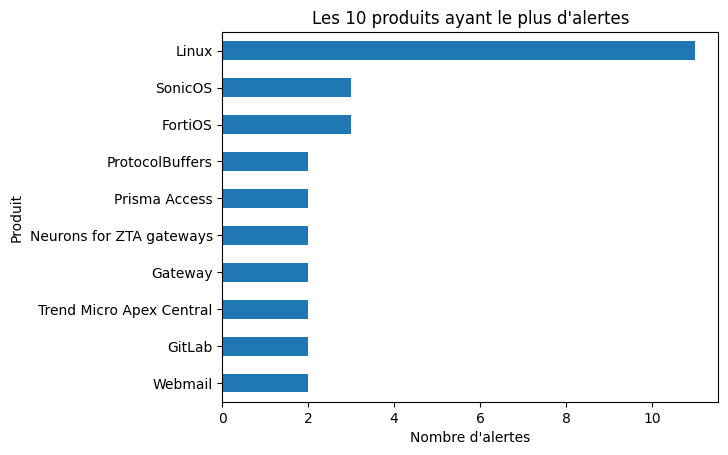

In [48]:
alertes_produit = df["Produit"].value_counts().nlargest(10)
alertes_produit.plot(kind="barh")
plt.title("Les 10 produits ayant le plus d'alertes")
plt.xlabel("Nombre d'alertes")
plt.gca().invert_yaxis()
plt.show()

Ce diagramme en barres horizontales classe les produits les plus affectés par les vulnérabilités. Les produits en haut ont le plus d'alertes de sécurité, ce qui devrait être votre priorité pour les correctifs.

## Diagramme circulaire des 10 types de vulnérabilités les plus présents + détails dans un tableau

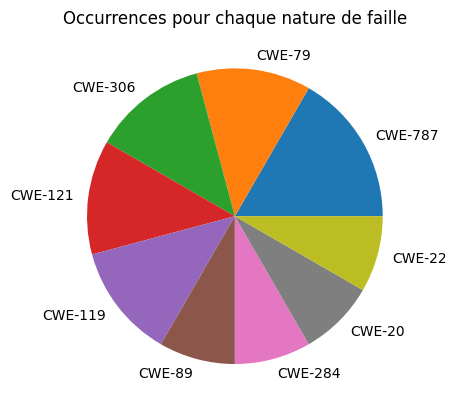

,count
Nature de la faille,
Execute unauthorized code or commands,6
CWE-119 Improper Restriction of Operations within the Bounds of a Memory Buffer,3
CWE-22: Improper Limitation of a Pathname to a Restricted Directory ('Path Traversal'),2
CWE-306 Missing Authentication for Critical Function,2
CWE-79 Improper Neutralization of Input During Web Page Generation (XSS or 'Cross-site Scripting'),2
CWE-284 Improper Access Control,2
CWE-89 Improper Neutralization of Special Elements used in an SQL Command ('SQL Injection'),2
CWE-20: Improper Input Validation,2
CWE-130: Improper Handling of Length Parameter Inconsistency,1


In [49]:

nb_cwe = df["CWE"].value_counts().nlargest(10)
nb_cwe = nb_cwe.drop(labels=["Non disponible"])
nb_cwe.plot(kind="pie")
plt.xlabel("")
plt.ylabel("")
plt.title("Occurrences pour chaque nature de faille")
plt.show()

nb_nature_faille = df["Nature de la faille"].value_counts().nlargest(10)
nb_nature_faille = nb_nature_faille.drop(labels=["Non disponible"])

df_nature_faille = pd.DataFrame(nb_nature_faille)
df_nature_faille

Le diagramme circulaire montre la répartition des types de failles détectées (injection SQL, XSS, authentification faible...).
La parts les plus grandes représentent les catégories de vulnérabilités les plus fréquentes
Le tableau qui suit détaille le nombre exact d'occurrences par type de faille


## Editeurs ayant le score EPSS le plus élevé

In [50]:
epss_editeur = df.nlargest(10, "Score EPSS")[["Éditeur", "Score EPSS"]]
epss_editeur

,Éditeur,Score EPSS
46,Ivanti,0.94423
51,Ivanti,0.94412
49,Citrix,0.94348
58,checkpoint,0.94342
65,Palo Alto Networks,0.94300
56,Palo Alto Networks,0.94297
42,NaN,0.94254
48,Cisco,0.94069
45,Citrix,0.93993
44,NaN,0.93918


Ce tableau affiche les 10 vulnérabilités avec les plus hauts risques d'exploitation réelle. L'éditeur associé montre qui doit être contacté en priorité pour les correctifs critiques.